In [1]:
#%matplotlib notebook

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import json
import csv
from scipy.stats import linregress
from cycler import cycler



In [2]:
# Import CSV file
path = "college_data.csv"
college_data = pd.read_csv(path, encoding='utf-8')
college_data_df = pd.DataFrame(college_data)
#college_data_df.head()

In [3]:
college_df_sorted = college_data_df.sort_values(["College_names","Year"],ascending = (True))

In [4]:
del college_df_sorted['Enrollment']
#college_df_sorted

In [5]:
college_df_sorted = college_df_sorted.rename(columns={'Student Size': 'Student_size'})


college_df_sorted['%_In_state_chng'] =college_df_sorted.groupby('College_names').In_state_tuition.pct_change()
college_df_sorted['%_Out_of_state_chng'] =college_df_sorted.groupby('College_names').Out_of_state_tuition.pct_change()
college_df_sorted['%_admissions_rate_chng'] =college_df_sorted.groupby('College_names').Admissions_rate_overall.pct_change()
college_df_sorted['%_Student_size_chng'] =college_df_sorted.groupby('College_names').Student_size.pct_change()

college_data_df = college_df_sorted
college_data_df[["College_names","College_state"]] = college_data_df[["College_names","College_state"]].replace(
    '"', '', regex=True)

college_df = college_df_sorted
college_df.count()

Year                       204
College_names              204
College_state              204
In_state_tuition           204
Out_of_state_tuition       204
Admissions_rate_overall    204
Student_size               204
%_In_state_chng            192
%_Out_of_state_chng        192
%_admissions_rate_chng     192
%_Student_size_chng        192
dtype: int64

## Start graphing !!!

In [6]:
# # Import CSV for 
# path = "clean_app_data.csv"
# admin_data = pd.read_csv(path, encoding='utf-8')
# admin_data_df = pd.DataFrame(admin_data)
# #admin_data_df

In [7]:
# clean_admin_df = admin_data_df.loc[(admin_data_df['Year'] >= 2002) &
#                                    (admin_data_df['Year'] <= 2018)
#                                   ]
# clean_admin_df.astype({'Year': 'int32'})
# college_df = clean_admin_df
#college_df

In [8]:
# Create dataframe for each college
WSU = college_df.loc[college_df["College_names"] == 'Washington State University']
ASU = college_df.loc[college_df["College_names"] == 'Arizona State University-Tempe']
UCLA = college_df.loc[college_df["College_names"] == 'University of California-Los Angeles']
Stanford = college_df.loc[college_df["College_names"] == 'Stanford University']
UofA = college_df.loc[college_df["College_names"] == 'University of Arizona']
Berkeley = college_df.loc[college_df["College_names"] == 'University of California-Berkeley']
UCBoulder = college_df.loc[college_df["College_names"] == 'University of Colorado Boulder']
USC = college_df.loc[college_df["College_names"] == 'University of Southern California']
UW = college_df.loc[college_df["College_names"] == 'University of Washington-Seattle Campus']
OSU = college_df.loc[college_df["College_names"] == 'Oregon State University']
UofO = college_df.loc[college_df["College_names"] == 'University of Oregon']
UofU = college_df.loc[college_df["College_names"] == 'University of Utah']

# Create list of dataframes for each college
school_data = [WSU, ASU, UCLA, Stanford, UofA, Berkeley, UCBoulder, USC, UW, OSU, UofO, UofU]

In [9]:
# Loop through list of dataframes of pac 12 schools to graph schools individually on the same graph
UofO

,Year,College_names,College_state,In_state_tuition,Out_of_state_tuition,Admissions_rate_overall,Student_size,%_In_state_chng,%_Out_of_state_chng,%_admissions_rate_chng,%_Student_size_chng
102,2002,University of Oregon,OR,4230,15219,0.9002,15560,NaN,NaN,NaN,NaN
103,2003,University of Oregon,OR,4914,16350,0.8574,15584,0.161702,0.074315,-0.047545,0.001542
104,2004,University of Oregon,OR,5490,16914,0.8439,16024,0.117216,0.034495,-0.015745,0.028234
105,2005,University of Oregon,OR,5613,17445,0.9092,16164,0.022404,0.031394,0.077379,0.008737
106,2006,University of Oregon,OR,5838,18252,0.9037,16282,0.040086,0.046260,-0.006049,0.007300
107,2007,University of Oregon,OR,6174,19338,0.8808,16422,0.057554,0.059500,-0.025340,0.008598
108,2008,University of Oregon,OR,6435,19992,0.8694,17356,0.042274,0.033819,-0.012943,0.056875
109,2009,University of Oregon,OR,7430,23720,0.8527,18213,0.154623,0.186475,-0.019209,0.049378
110,2010,University of Oregon,OR,8190,25830,0.7966,19219,0.102288,0.088954,-0.065791,0.055235
111,2011,University of Oregon,OR,8789,27653,0.7879,20248,0.073138,0.070577,-0.010921,0.053541


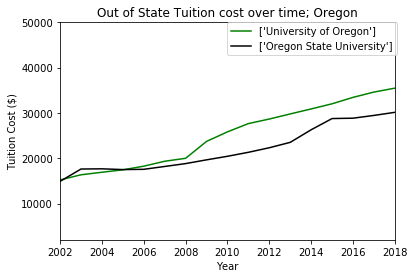


Analysis: 



In [10]:
# State of Oregon
school_data = [UofO, OSU]

fig1 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['green', 'black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(0.5, 1), loc='upper left', borderaxespad=0.)


        

plt.title("Out of State Tuition cost over time; Oregon")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show(fig1)


print("""
Analysis: 
"""
)

# fig1.savefig('state_tuition/OREGON_IN.png')

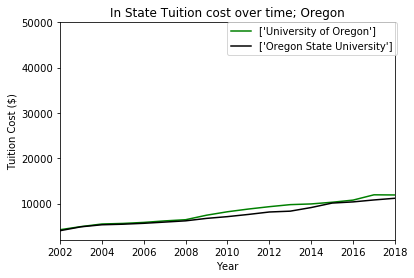


Analysis: 



In [12]:
# State of Oregon
school_data = [UofO, OSU]
fig2 = plt.figure()
colors = ['green','orange']
for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['green', 'black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0.)

plt.title("In State Tuition cost over time; Oregon")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

fig2.savefig('state_tuition/OREGON_OUT.png')

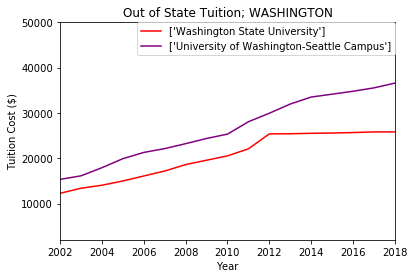


Analysis: 



In [13]:
# State of Washington
school_data = [WSU, UW]
fig3 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'purple'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.23, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of State Tuition; WASHINGTON")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

fig3.savefig('state_tuition/WASHINGTON_OUT.png')

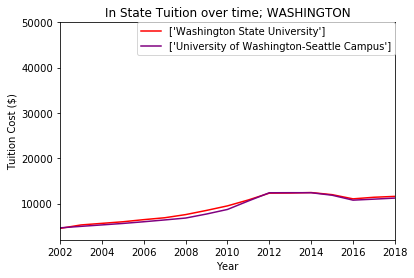


Analysis: 



In [14]:
# State of Washington
school_data = [WSU, UW]
fig4 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'purple'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.23, 1), loc='upper left', borderaxespad=0.)

plt.title("In State Tuition over time; WASHINGTON")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

fig4.savefig('state_tuition/WASHINGTON_IN.png')

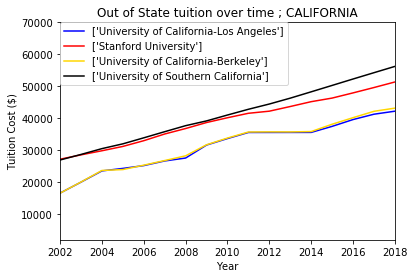


Analysis: 



In [15]:
# State of California
school_data = [UCLA, Stanford, Berkeley, USC]
fig5 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['blue', 'red', 'gold', 'black'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of State tuition over time ; CALIFORNIA")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,70000)
plt.show()


print("""
Analysis: 
"""
)

fig5.savefig('state_tuition/CALIFORNIA_OUT.png')

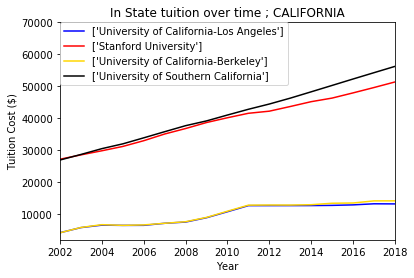


Analysis: 



In [16]:
# State of California
school_data = [UCLA, Stanford, Berkeley, USC]
fig6 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['blue', 'red', 'gold', 'black'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.)

plt.title("In State tuition over time ; CALIFORNIA")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,70000)
plt.show()


print("""
Analysis: 
"""
)

fig6.savefig('state_tuition/CALIFORNIA_IN.png')

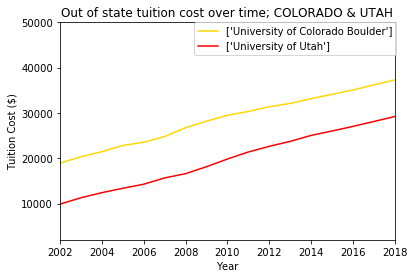


Analysis: 



In [17]:
# State of Colorado and Utah
school_data = [UCBoulder,UofU]
fig7 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.4, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of state tuition cost over time; COLORADO & UTAH")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

fig7.savefig('state_tuition/COLORADO_UTAH_OUT.png')

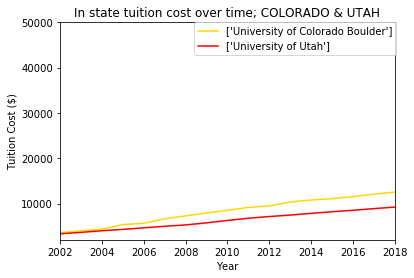


Analysis: 



In [18]:
# State of Colorado and Utah
school_data = [UCBoulder,UofU]
fig8 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.4, 1), loc='upper left', borderaxespad=0.)

plt.title("In state tuition cost over time; COLORADO & UTAH")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

fig8.savefig('state_tuition/COLORADO_UTAH_IN.png')

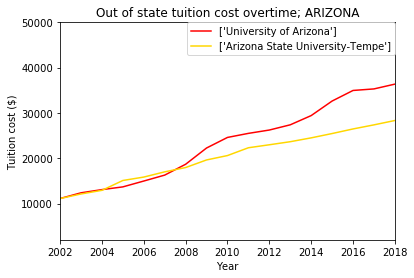


Analysis: 



In [19]:
# State of Arizona 
school_data = [UofA, ASU]
fig9 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'gold'])))  
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.38, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of state tuition cost overtime; ARIZONA")
plt.xlabel("Year")
plt.ylabel("Tuition cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

fig9.savefig('state_tuition/ARIZONA_OUT.png')

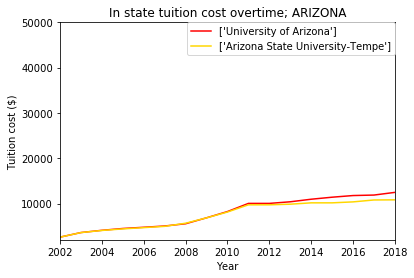


Analysis: 



In [20]:
# State of Arizona 
school_data = [UofA, ASU]
fig10 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'gold']))) 
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.38, 1), loc='upper left', borderaxespad=0.)

plt.title("In state tuition cost overtime; ARIZONA")
plt.xlabel("Year")
plt.ylabel("Tuition cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

fig10.savefig('state_tuition/ARIZONA_IN.png')